# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
 Kaggle : https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales

   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from collections import Counter

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat Dataset Dari Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
file_path = '/content/drive/My Drive/DBS/Dicoding Submission BMLP/synthetic_beverage_sales_data.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [21]:
# 1.Memahami struktur data
# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:")
df.shape

Jumlah baris dan kolom:


(8999910, 11)

In [24]:
# Menampilkan jenis data di setiap kolom (numerikal atau kategorikal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [25]:
# 2. Menangani Data yang Hilang
# Identifikasi dan analisis data yang hilang (missing values).
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


Catatan : Data sudah bersih dari Missing Values

In [27]:
# 3. Analisis Distribusi dan Korelasi
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


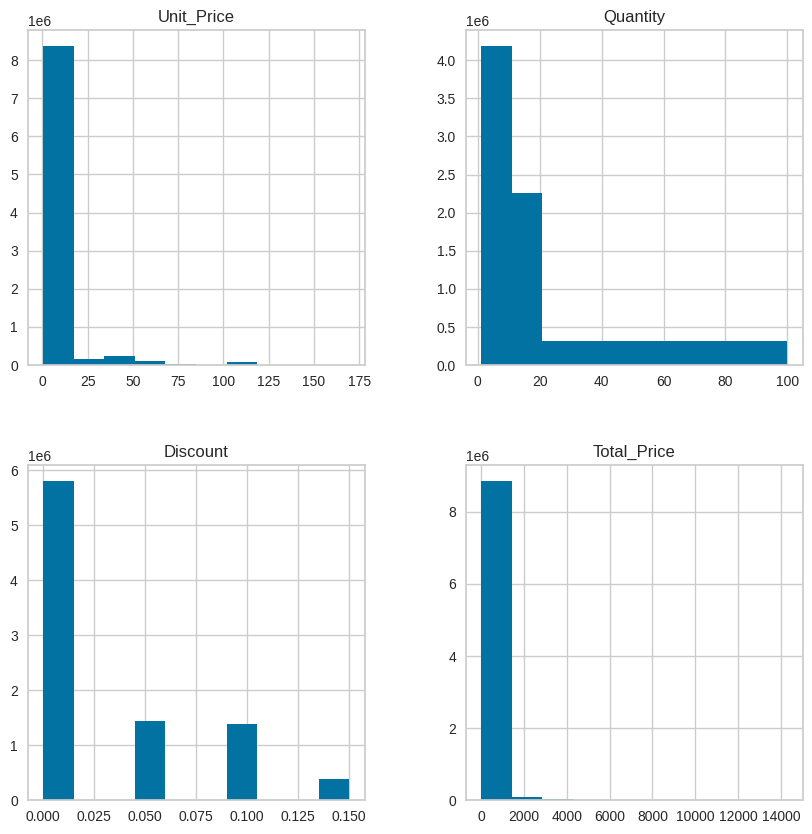

In [28]:
# Menganalisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
df.hist(figsize=(10, 10))
plt.show()

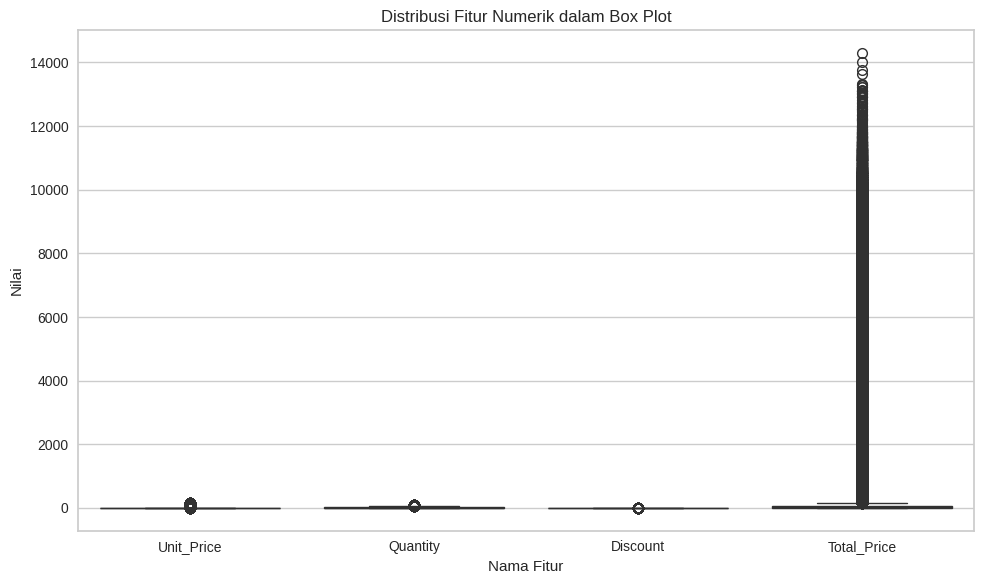

In [30]:
# boxplot untuk distribusi
fig, ax = plt.subplots(1, figsize=(10, 6))
sns.boxplot(data=df[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']], ax=ax)
ax.set_title('Distribusi Fitur Numerik dalam Box Plot')
ax.set_xlabel('Nama Fitur')
ax.set_ylabel('Nilai')

# Menata tampilan plot agar lebih rapi
plt.tight_layout()
plt.show()


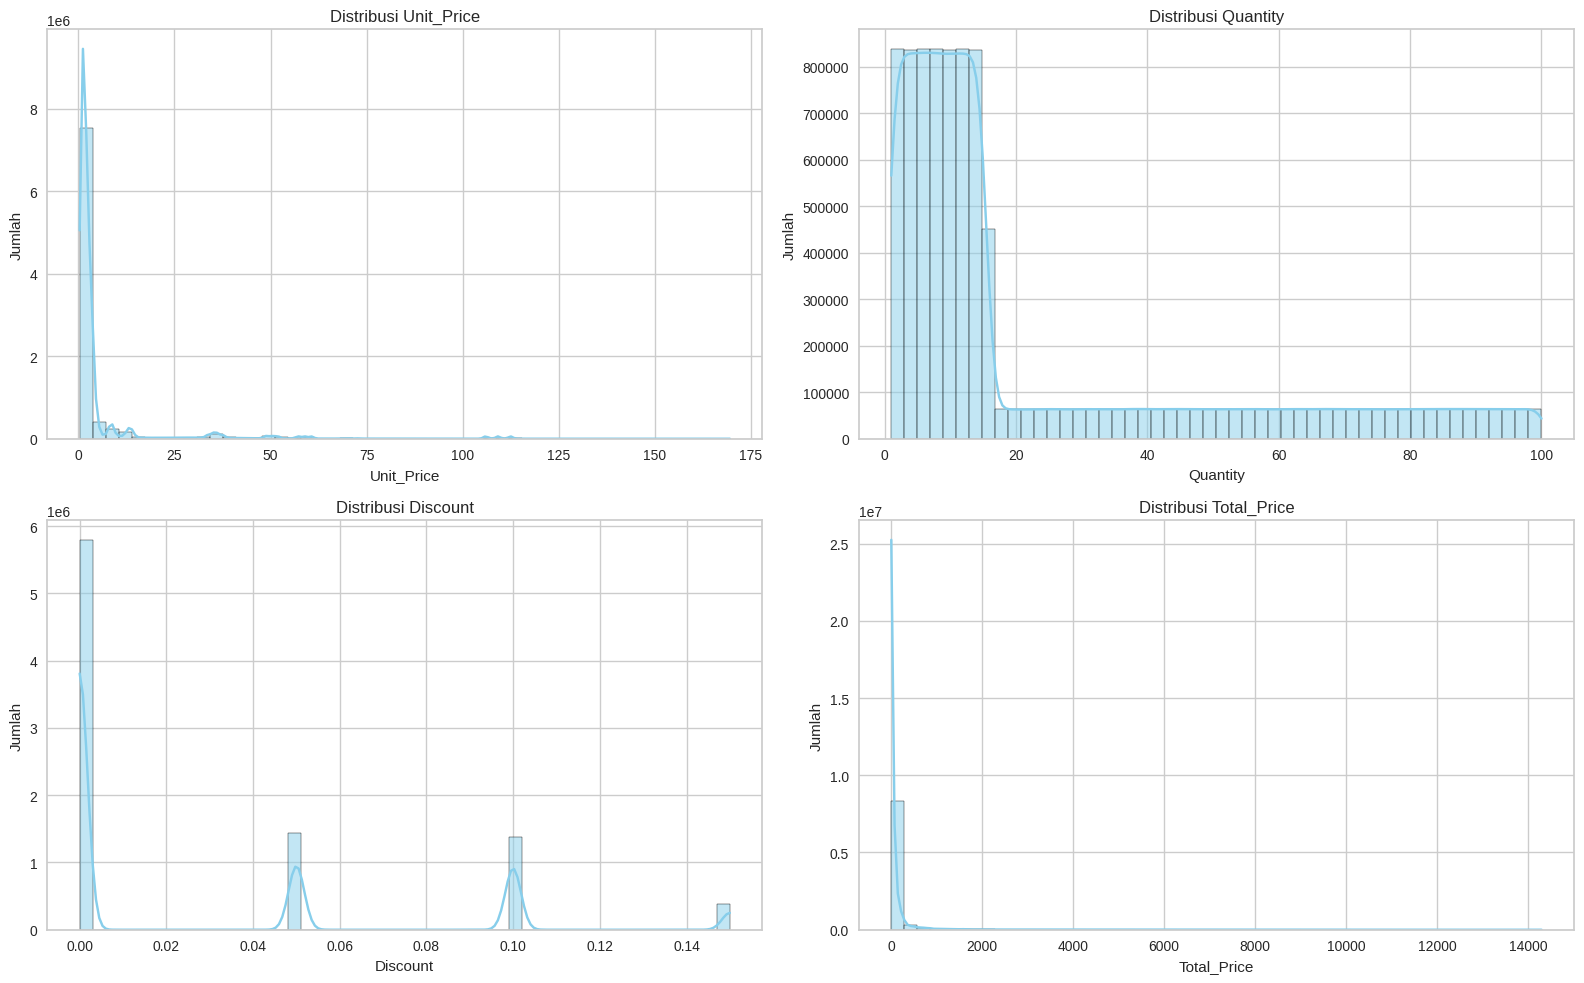

In [34]:
# Histogram Untuk Distribusi
# Daftar kolom numerik yang ingin divisualisasikan
numeric_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

# Ukuran figure
plt.figure(figsize=(16, 10))

# Loop untuk membuat subplot histogram per kolom
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [35]:
# Menghitung matriks korelasi untuk data numerik saja
correlation_matrix = df.corr(numeric_only=True)

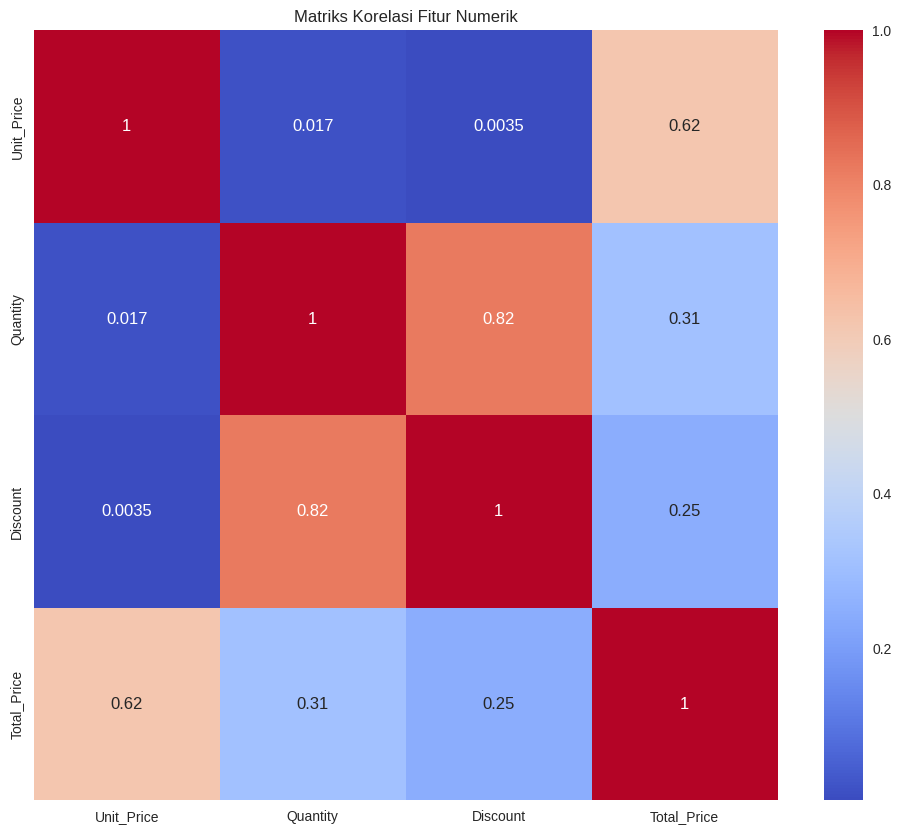

In [36]:
# 4. Visualisasi Data
# Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
# Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

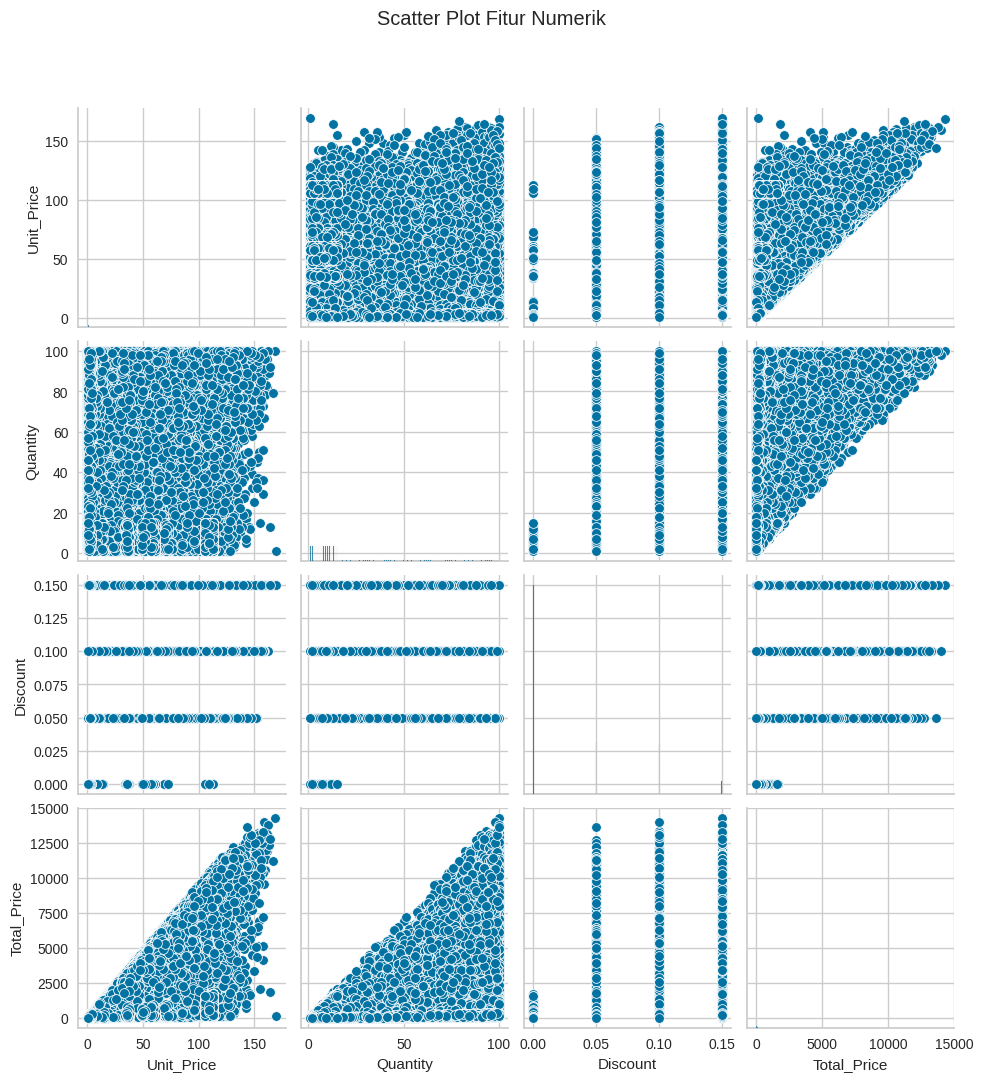

In [38]:
# Membuat pair plot untuk fitur numerik pada dataset
g = sns.pairplot(df[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']])
g.fig.suptitle('Scatter Plot Fitur Numerik', y=1.08)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [40]:
print(df.columns)

Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region',
       'Order_Date'],
      dtype='object')


In [44]:
# Agregasi data berdasarkan kombinasi Customer_Type dan Region
# Kita hitung statistik numerikal untuk setiap kombinasi
agg_df = df.groupby(['Customer_Type', 'Region']).agg({
    'Unit_Price': 'mean',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Total_Price': 'sum'
}).reset_index()

In [45]:
# Encoding kolom kategorikal (Customer_Type dan Region)
agg_encoded = pd.get_dummies(agg_df, columns=['Customer_Type', 'Region'])

In [46]:
# Normalisasi data numerik
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(agg_encoded), columns=agg_encoded.columns)

In [47]:
# Data siap untuk clustering
scaled_data.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C,Region_Baden-Württemberg,Region_Bayern,Region_Berlin,Region_Brandenburg,...,Region_Hessen,Region_Mecklenburg-Vorpommern,Region_Niedersachsen,Region_Nordrhein-Westfalen,Region_Rheinland-Pfalz,Region_Saarland,Region_Sachsen,Region_Sachsen-Anhalt,Region_Schleswig-Holstein,Region_Thüringen
0,-0.343924,0.856986,0.999277,0.878268,1.0,-1.0,3.872983,-0.258199,-0.258199,-0.258199,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199
1,-0.227180,0.901473,1.003350,0.940650,1.0,-1.0,-0.258199,3.872983,-0.258199,-0.258199,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199
2,-0.012066,0.984900,0.998387,1.064621,1.0,-1.0,-0.258199,-0.258199,3.872983,-0.258199,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199
3,-0.112192,0.865462,0.999365,0.922550,1.0,-1.0,-0.258199,-0.258199,-0.258199,3.872983,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199
4,-3.428564,1.035496,0.999479,0.655362,1.0,-1.0,-0.258199,-0.258199,-0.258199,-0.258199,...,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199,-0.258199


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [48]:
# 1. Tentukan range jumlah cluster untuk dicoba
range_n_clusters = range(2, 11)

In [49]:
# 2. Simpan model dan nilai inertia/silhouette untuk evaluasi nanti
kmeans_models = {}
inertias = []
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    kmeans_models[k] = kmeans
    inertias.append(kmeans.inertia_)

    # Silhouette Score
    from sklearn.metrics import silhouette_score
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Clusters: {k} | Silhouette Score: {score:.4f}")

Clusters: 2 | Silhouette Score: 0.1901
Clusters: 3 | Silhouette Score: 0.1923
Clusters: 4 | Silhouette Score: 0.0989
Clusters: 5 | Silhouette Score: 0.0221
Clusters: 6 | Silhouette Score: 0.0217
Clusters: 7 | Silhouette Score: 0.0091
Clusters: 8 | Silhouette Score: 0.0349
Clusters: 9 | Silhouette Score: 0.0547
Clusters: 10 | Silhouette Score: 0.0828


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Text(0.5, 1.0, 'Elbow Method')

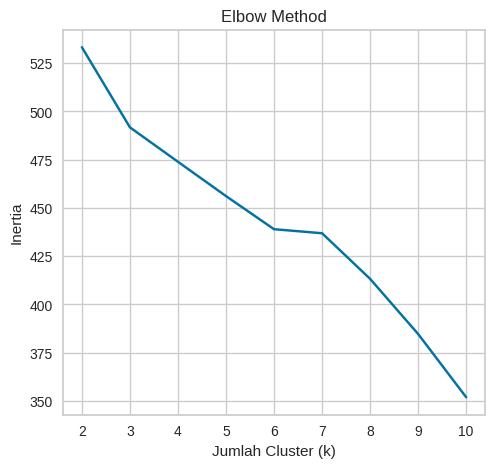

In [50]:
# Elbow Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range_n_clusters, inertias, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

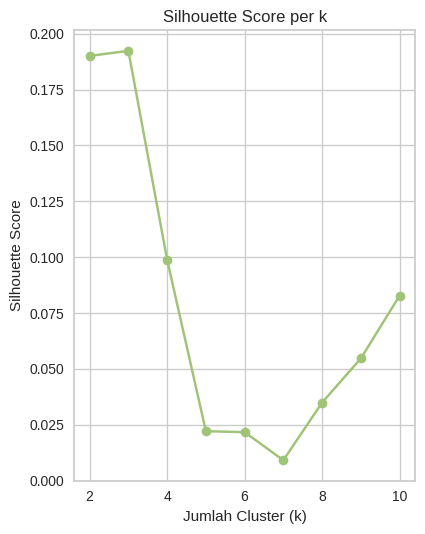

In [51]:
# Silhouette Score Plot
plt.subplot(1,2,2)
plt.plot(range_n_clusters, silhouette_scores, 'go-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per k')

plt.tight_layout()
plt.show()

In [52]:
# Final model clustering dengan jumlah cluster terbaik
best_k = 3
final_model = kmeans_models[best_k]

# Tambahkan label cluster ke data asli (agg_df)
agg_df['Cluster'] = final_model.labels_

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [54]:
# PCA untuk 2D Projection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [55]:
# Buat DataFrame hasil PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = final_model.labels_

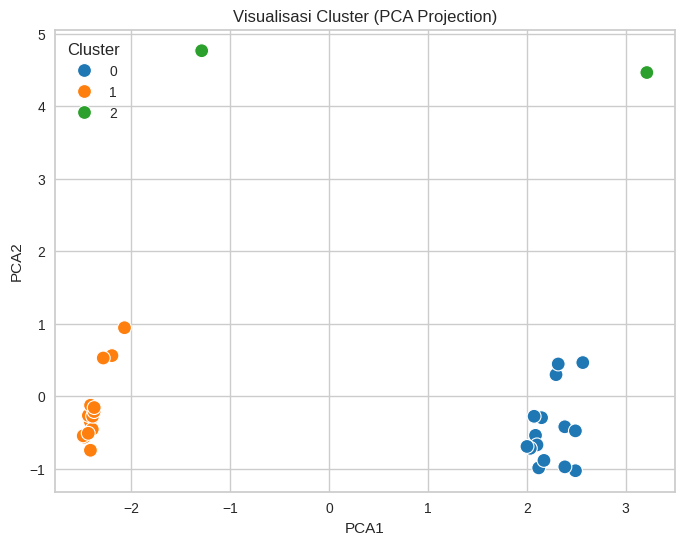

In [56]:
# Plot Clustering Result
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title("Visualisasi Cluster (PCA Projection)")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [59]:
# Rata-rata tiap fitur numerik di setiap cluster
cluster_summary = agg_df.groupby('Cluster')[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']].mean()
print("Summary per Cluster:")
print(cluster_summary)

Summary per Cluster:
         Unit_Price      Quantity  Discount   Total_Price
Cluster                                                  
0          5.672482  1.010726e+07  0.083496  5.679208e+07
1          5.972032  2.896389e+06  0.000000  1.731876e+07
2          5.073134  6.593162e+06  0.041736  3.250924e+07


In [60]:
# Cek kombinasi Customer_Type dan Region dalam setiap cluster
print("\nDistribusi Customer_Type & Region per Cluster:")
print(agg_df.groupby('Cluster')[['Customer_Type', 'Region']].agg(lambda x: x.mode()[0]))


Distribusi Customer_Type & Region per Cluster:
        Customer_Type             Region
Cluster                                 
0                 B2B  Baden-Württemberg
1                 B2C  Baden-Württemberg
2                 B2B             Bremen


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## 🔹 Cluster 0:
- **Rata-rata Harga Satuan (Unit Price): €5.67**
- **Rata-rata Spending Score (1-100):** 56.48**
- **Rata-rata Diskon (Discount): 8.35%**
- **Total Nilai Transaksi (Total Price): €56.79 juta**

**Analisis:**

Cluster ini terdiri dari pelanggan dengan jumlah pembelian produk yang sangat tinggi dan mendapatkan diskon yang juga cukup besar. Meskipun harga satuannya tidak tertinggi, volume transaksi yang besar menunjukkan bahwa kelompok ini mungkin adalah pelanggan besar seperti distributor atau mitra bisnis strategis.



## 🔹 Cluster 1:
- **Rata-rata Harga Satuan (Unit Price): €5.97**
- **Total Kuantitas Produk (Quantity): 2.89 juta unit**
- **Rata-rata Diskon (Discount): 0.00%**
- **Total Nilai Transaksi (Total Price): €17.32 juta**

**Analisis:**

Pelanggan dalam cluster ini membayar harga penuh tanpa diskon, tetapi masih melakukan pembelian dalam jumlah besar. Dengan harga satuan tertinggi dan volume sedang, cluster ini kemungkinan mencerminkan segmen pelanggan premium atau loyal yang membeli dalam jumlah banyak tanpa perlu insentif diskon.


## 🔹 Cluster 2:
- **Rata-rata Harga Satuan (Unit Price): €5.07**
- **Total Kuantitas Produk (Quantity): 6.59 juta unit**
- **Rata-rata Diskon (Discount): 4.17%**
- **Total Nilai Transaksi (Total Price): €32.51 juta**

**Analisis:**

Cluster ini menunjukkan kelompok pelanggan dengan harga satuan lebih rendah dan diskon sedang. Volume pembelian cukup tinggi. Ini bisa jadi adalah segmen ritel skala menengah, di mana pelanggan lebih sensitif terhadap harga dan memanfaatkan diskon untuk meningkatkan pembelian.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [62]:
# Gabungkan hasil clustering ke data asli yang sudah di-aggregate
agg_df['Cluster'] = final_model.labels_

In [63]:
agg_df.to_csv('/content/drive/My Drive/DBS/Dicoding Submission BMLP/Dataset Hasil Clustering.csv', index=False)